In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import helper
from matplotlib.lines import Line2D

In [3]:
exp_measures = pd.read_csv("measures.csv")

In [8]:
def plot_var_by_condition(exp_measures, model_measures, var, model_label, include_model=True, include_legend=False):
    tta_or_conditions = [4, 6]
    markers=["o", "s"]
    colors = ["C0", "C1"]

    fig, axes = plt.subplots(1, 2, figsize=(4,2), sharex=True, sharey=True)

    for tta, ax in zip([4, 6], axes):
        for tta_or, color, marker in zip(tta_or_conditions, colors, markers):
            exp_measures_by_d = exp_measures[(exp_measures.tta_condition == tta) & (exp_measures.tta_or_condition == tta_or)]
            model_measures_by_d = model_measures[(model_measures.tta_condition==tta) & (model_measures.tta_or_condition==tta_or)]

            if var == "is_gap_accepted":
                psf_ci = helper.get_psf_ci(exp_measures_by_d)
                ax.plot(psf_ci.d_condition, psf_ci.p_go, ls="", marker=marker, ms=9, color=color, zorder=10)
                ax.vlines(x=psf_ci.d_condition, ymin=psf_ci.ci_l, ymax=psf_ci.ci_r, color=color, zorder=10)
                if include_model:
                    ax.plot(model_measures_by_d.d_condition, model_measures_by_d.is_gap_accepted, color=color, label=tta)
                ax.set_ylim((0, 1))
            else:
                if var == "RT_merge":
                    measures_mean_sem = helper.get_mean_sem(exp_measures_by_d[exp_measures_by_d.is_gap_accepted],
                                                        var="RT", groupby_var="d_condition", n_cutoff=10)
                elif var == "RT_wait":
                    measures_mean_sem = helper.get_mean_sem(exp_measures_by_d[~(exp_measures_by_d.is_gap_accepted)],
                                                        var="RT", groupby_var="d_condition", n_cutoff=10)
                # measures = exp_measures_by_d[(exp_measures.is_gap_accepted)].groupby(["subj_id", "d_condition"]).mean().reset_index()
                # if len(measures) > 0:
                #     measures_mean_sem = helper.get_mean_sem(measures, var="RT", groupby_var="d_condition", n_cutoff=2)
                    # ax.errorbar(measures_mean_sem.index, measures_mean_sem["mean"], yerr=measures_mean_sem["sem"],
                    #             ls="", marker=marker, ms=9, color=color)
                # measures_mean_sem = helper.get_mean_sem(exp_measures_by_d[exp_measures_by_d.is_gap_accepted],
                #                                         var="RT", groupby_var="d_condition", n_cutoff=10)
                ax.errorbar(measures_mean_sem.index, measures_mean_sem["mean"], yerr=measures_mean_sem["sem"],
                                ls="", marker=marker, ms=9, color=color)
                if include_model:
                    ax.plot(model_measures_by_d.d_condition, model_measures_by_d[var], color=color, label=tta)

                # ax.set_ylim((1, 3))

        ax.set_xlim((model_measures_by_d.d_condition.min(), model_measures_by_d.d_condition.max()))
        # ax.set_xlabel("Distance to vehicle, m", fontsize=12)
        ax.set_title("TTA to vehicle=%is" % (tta), fontsize=12)

    # axes[0].set_ylabel(var, fontsize=16)
    if var=="is_gap_accepted":
        ylabel = "p(accept)"
    elif var=="RT_merge":
        ylabel = "accept RT"
    elif var=="RT_wait":
        ylabel = "reject RT"

    axes[0].set_ylabel(ylabel, fontsize=12)

    sns.despine(offset=5, trim=True)
    plt.tight_layout()
    fig.text(x=0.3, y=-0.05, s="Distance to vehicle, m", fontsize=12)
    if include_legend:
        legend_elements = ([Line2D([0], [0], color=color, marker=marker, ms=9, lw=0, label="Data, on-ramp TTA=%is" % (tta_or_condition))
                           for tta_or_condition, color, marker in zip(tta_or_conditions, colors, markers)]
                           + [Line2D([0], [0], color="grey", label="Model")])

        fig.legend(handles=legend_elements, loc="lower left", bbox_to_anchor=(1.0, 0.32), fontsize=16, frameon=False)
    plt.savefig("output/%s_%s_model_%r.png" % (var, model_label, include_model), bbox_inches="tight")

# Obsolete: left-turn model without tta_onramp in the collapsing boundary

In [62]:
model_measures = pd.read_csv("model_fit_results/left_turn_model_no_tta_or_bound/simulation_results/subj_all_measures.csv")
plot_var_by_condition(exp_measures, model_measures, var="is_gap_accepted")
plot_var_by_condition(exp_measures, model_measures, var="RT_merge")
plot_var_by_condition(exp_measures, model_measures, var="RT_wait")

# Modified left-turn model with tta_onramp in both drift and boundary

In [4]:
model_label="left_turn_model"
model_measures = pd.read_csv("model_fit_results/%s/simulation_results/subj_all_measures.csv" % model_label)

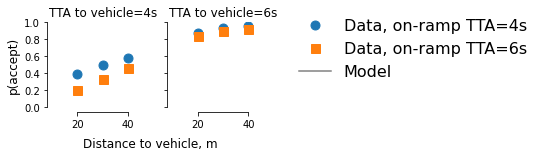

In [5]:
plot_var_by_condition(exp_measures, model_measures, var="is_gap_accepted", model_label=model_label,
                      include_model=False, include_legend=True)

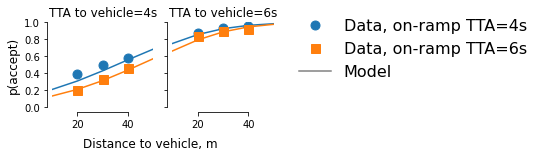

In [6]:
plot_var_by_condition(exp_measures, model_measures, var="is_gap_accepted", model_label=model_label,
                      include_model=True, include_legend=True)

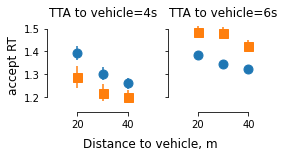

In [7]:
plot_var_by_condition(exp_measures, model_measures, var="RT_merge", model_label=model_label, include_model=False)

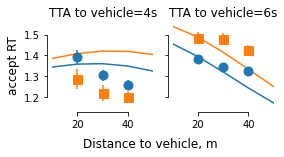

In [8]:
plot_var_by_condition(exp_measures, model_measures, var="RT_merge", model_label=model_label, include_model=True)

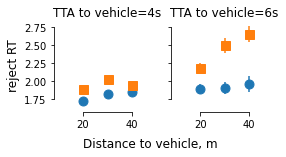

In [43]:
plot_var_by_condition(exp_measures, model_measures, var="RT_wait", model_label=model_label, include_model=False)

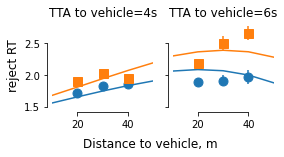

In [44]:
plot_var_by_condition(exp_measures, model_measures, var="RT_wait", model_label=model_label, include_model=True)

# Gaze-dependent model

In [9]:
model_label="gaze_dependent_model"
model_measures = pd.read_csv("model_fit_results/%s/simulation_results/subj_all_measures.csv" % (model_label))

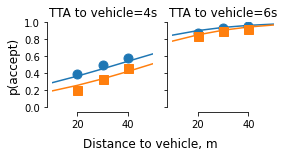

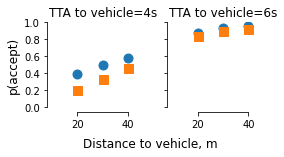

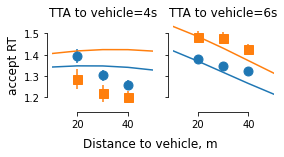

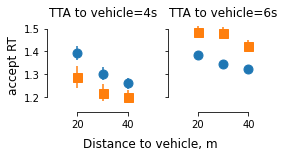

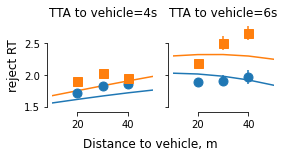

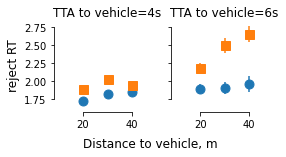

In [46]:
for var in ["is_gap_accepted", "RT_merge", "RT_wait"]:
    for include_model in [True, False]:
        plot_var_by_condition(exp_measures, model_measures, var=var, model_label=model_label, include_model=include_model)

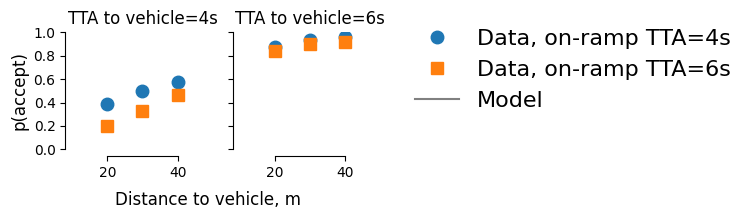

In [14]:
plot_var_by_condition(exp_measures, model_measures, var="is_gap_accepted", model_label=model_label, include_model=False, include_legend=True)

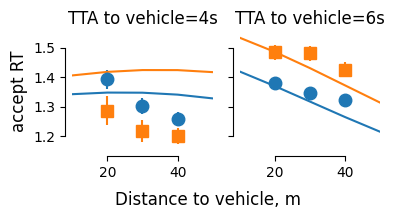

In [13]:
plot_var_by_condition(exp_measures, model_measures, var="RT_merge", model_label=model_label)

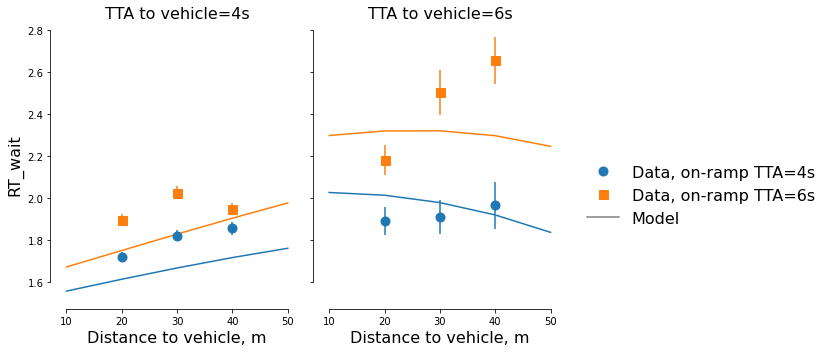

In [71]:
plot_var_by_condition(exp_measures, model_measures, var="RT_wait", model_label=model_label)

# Gaze-dependent drift & bound based on generalized gap

In [73]:
model_label="gaze_dependent_bound_generalized_gap_model"
model_measures = pd.read_csv("model_fit_results/%s/simulation_results/subj_all_measures.csv" % (model_label))

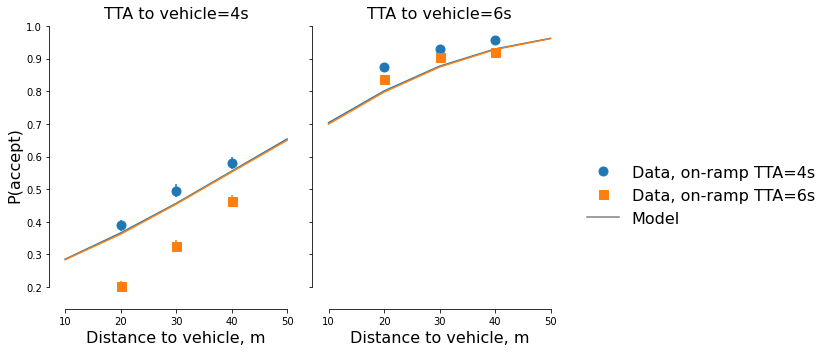

In [74]:
plot_var_by_condition(exp_measures, model_measures, var="is_gap_accepted", model_label=model_label)

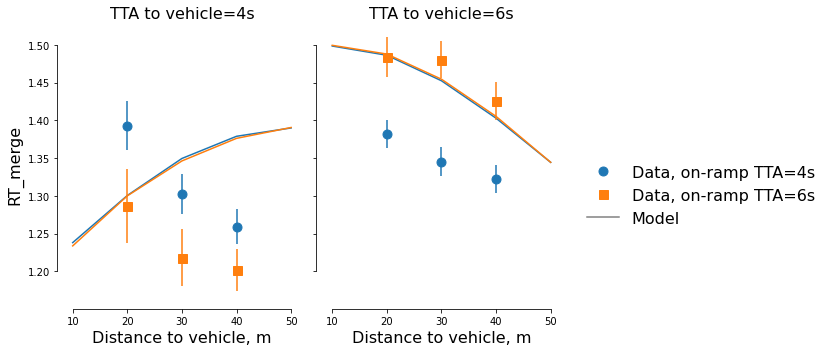

In [75]:
plot_var_by_condition(exp_measures, model_measures, var="RT_merge", model_label=model_label)

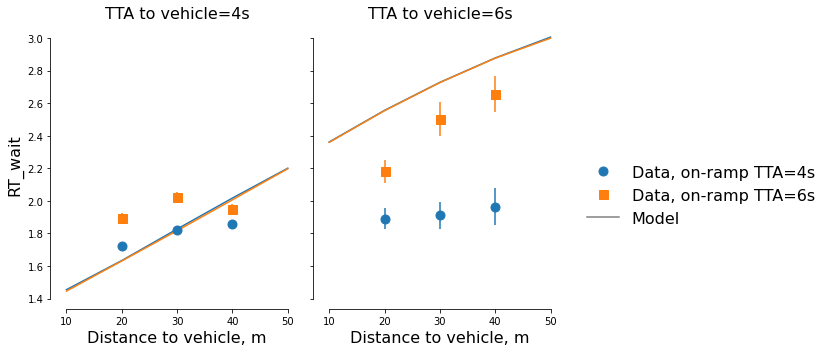

In [76]:
plot_var_by_condition(exp_measures, model_measures, var="RT_wait", model_label=model_label)

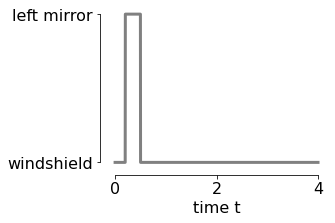

In [20]:
def get_gaze_sample(simulation_params):
    # In a typical trial, participants looked
    # 1) at the on-ramp for a short time - 300 ms
    # 2) at the mirror for 700 ms
    # 3) back at the on-ramp for the rest of the trial

    # return np.concatenate([np.zeros(int(0.2/simulation_params["dt"])), np.ones(int(1.0/simulation_params["dt"])),
    #                        np.zeros(int(0.1/simulation_params["dt"])), np.ones(int(0.2/simulation_params["dt"])),
    #                        np.zeros(int((simulation_params["duration"]-1.5)/simulation_params["dt"])+1)])

    return np.concatenate([np.zeros(int(0.2/simulation_params["dt"])), np.ones(int(0.3/simulation_params["dt"])),
                           np.zeros(int((simulation_params["duration"]-0.5)/simulation_params["dt"])+1)])

simulation_params = {"dt": 0.001, "duration": 4.0}

gaze_sample = get_gaze_sample(simulation_params)

plt.figure(figsize=(4, 3))
fontsize=16
plt.plot(np.linspace(0, simulation_params["duration"], len(gaze_sample)), gaze_sample, lw=3, color="grey")
ax = plt.gca()
ax.set_xlabel("time t", fontsize=fontsize)
ax.set_yticks([0, 1])
ax.set_yticklabels(["windshield", "left mirror"])
ax.tick_params(axis='both', which='major', labelsize=fontsize)
sns.despine(offset=5, trim=True)
plt.savefig("output/gaze_sample_1.png", bbox_inches="tight")

# Effect of kinematic variables on dwell time

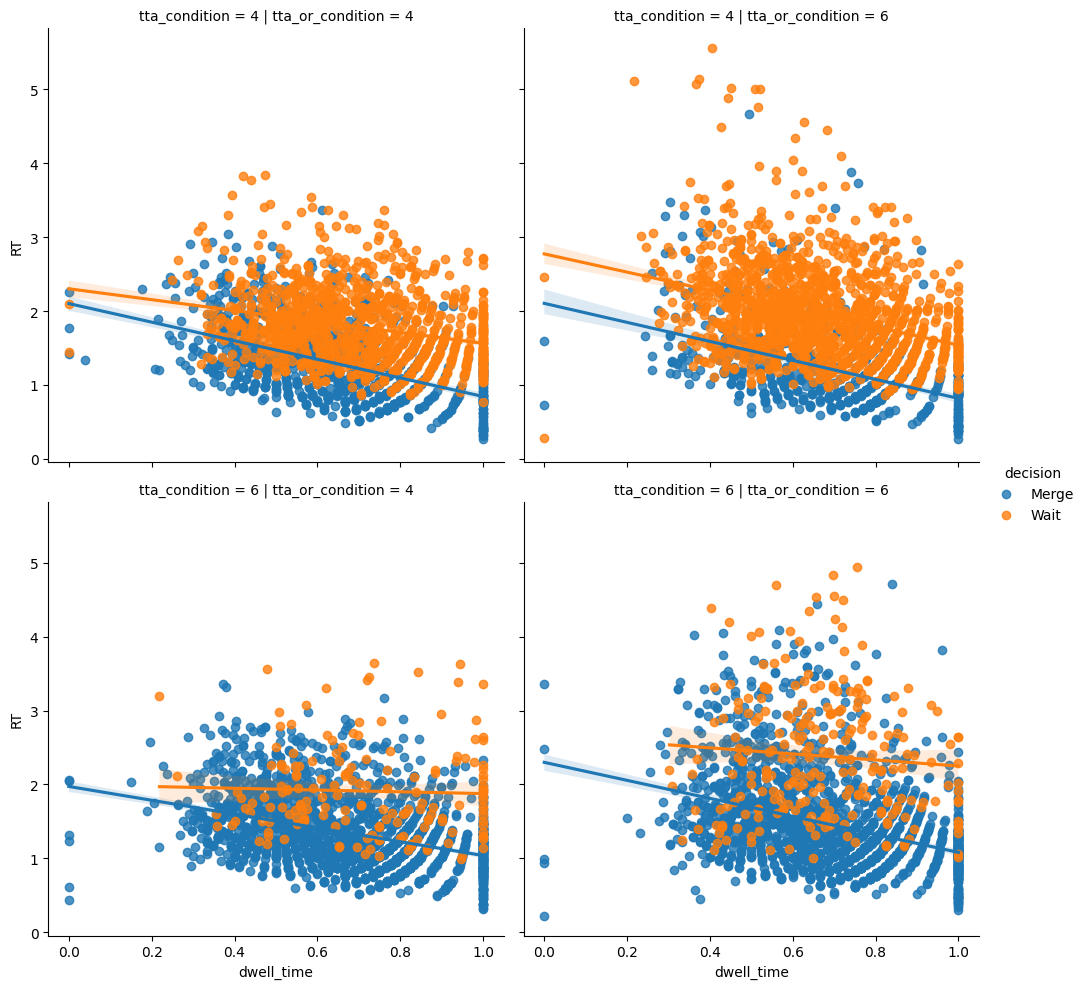

In [6]:
sns.lmplot(data=exp_measures, x="dwell_time", y="RT", hue="decision", col="tta_or_condition", row="tta_condition")

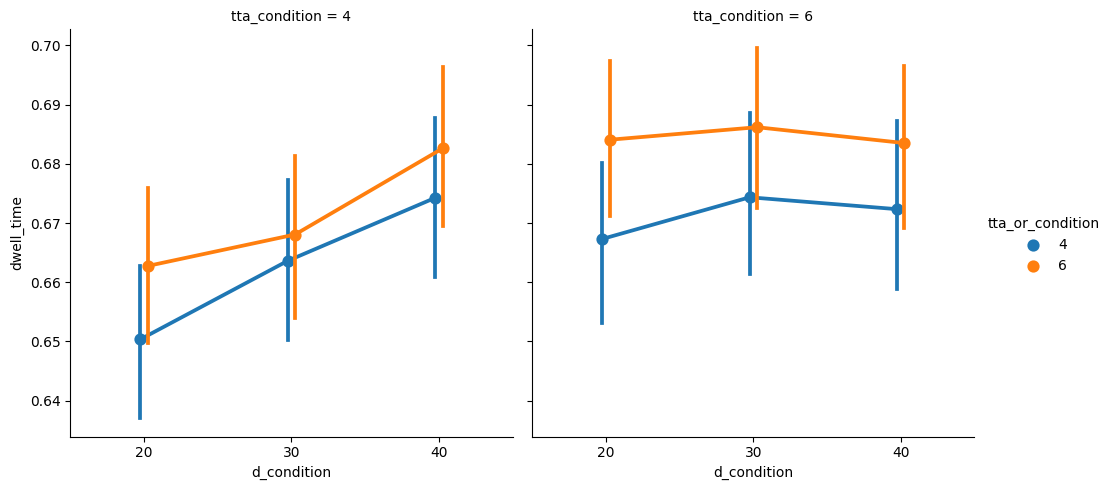

In [33]:
sns.catplot(data=exp_measures, x="d_condition", y="dwell_time", col="tta_condition", hue="tta_or_condition", kind="point", dodge=True)

# Effect of dwell time on decision

In [17]:
exp_measures["dwell_time_binary_coarse"] = pd.qcut(exp_measures['dwell_time'], 2, labels=["low", "high"])
exp_measures["dwell_time_tertile_coarse"] = pd.qcut(exp_measures['dwell_time'], 3, labels=[1, 2, 3])
exp_measures["dwell_time_tertile"] = exp_measures.groupby(["tta_condition", "d_condition", "tta_or_condition"]).apply(lambda m: pd.qcut(m['dwell_time'], 3, labels=[1, 2, 3])).values

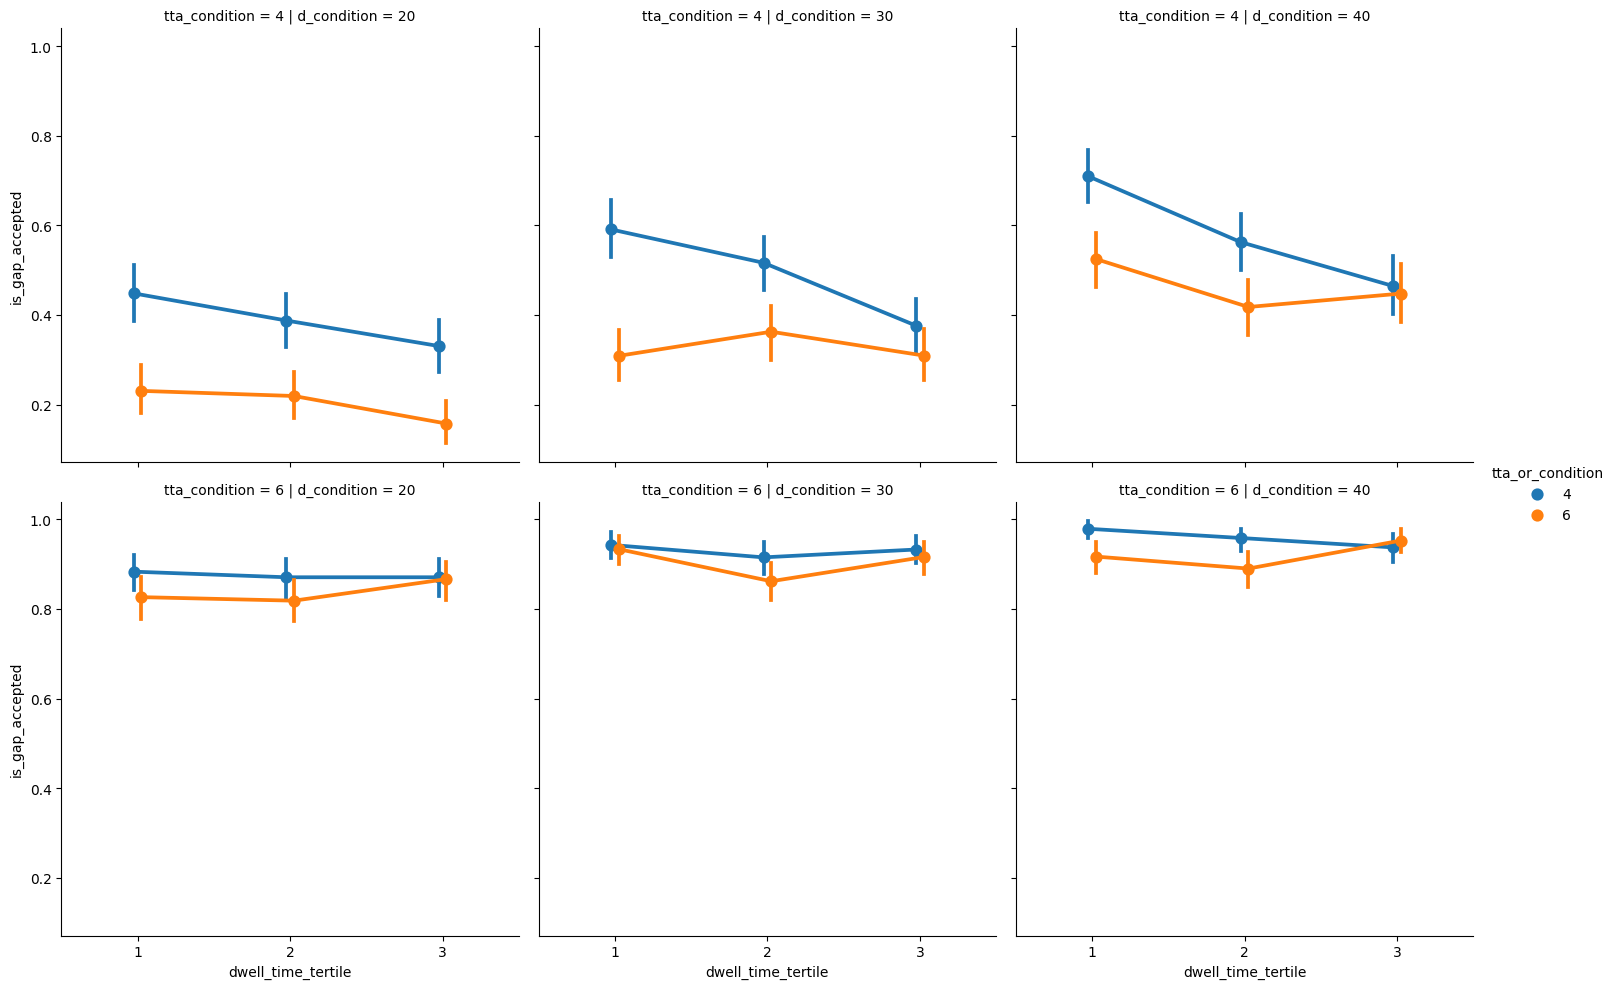

In [19]:
sns.catplot(data=exp_measures, x="dwell_time_tertile", y="is_gap_accepted", col="d_condition", row="tta_condition", hue="tta_or_condition", kind="point", dodge=True)

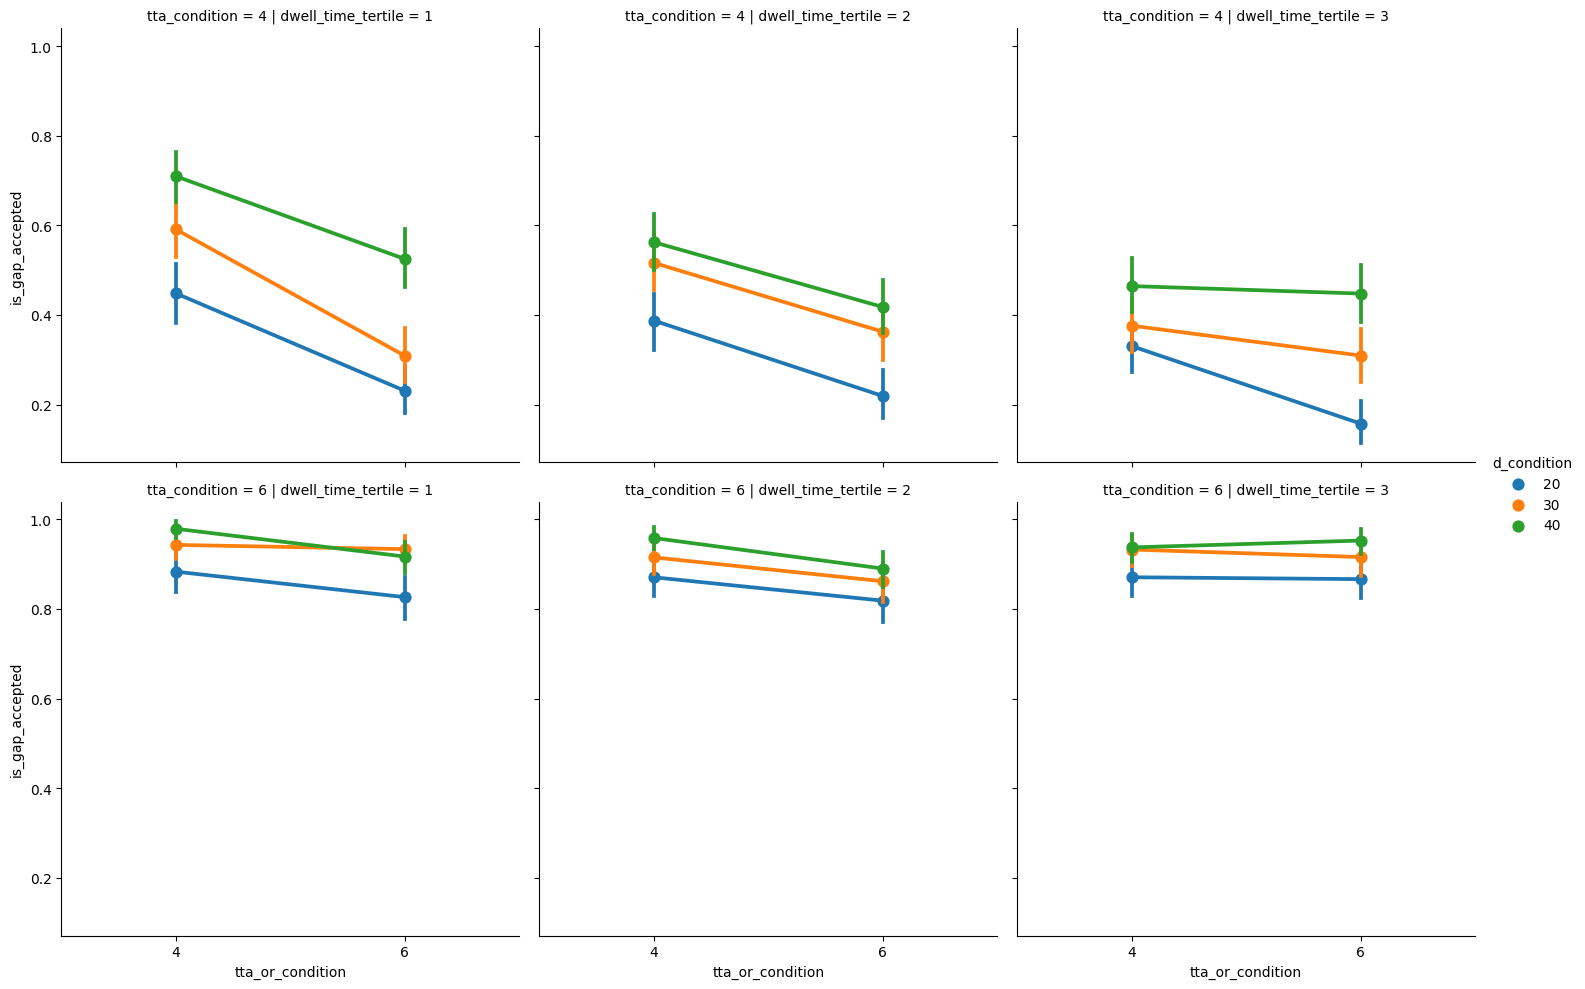

In [25]:
sns.catplot(data=exp_measures, x="tta_or_condition", y="is_gap_accepted", col="dwell_time_tertile", row="tta_condition", hue="d_condition", kind="point")

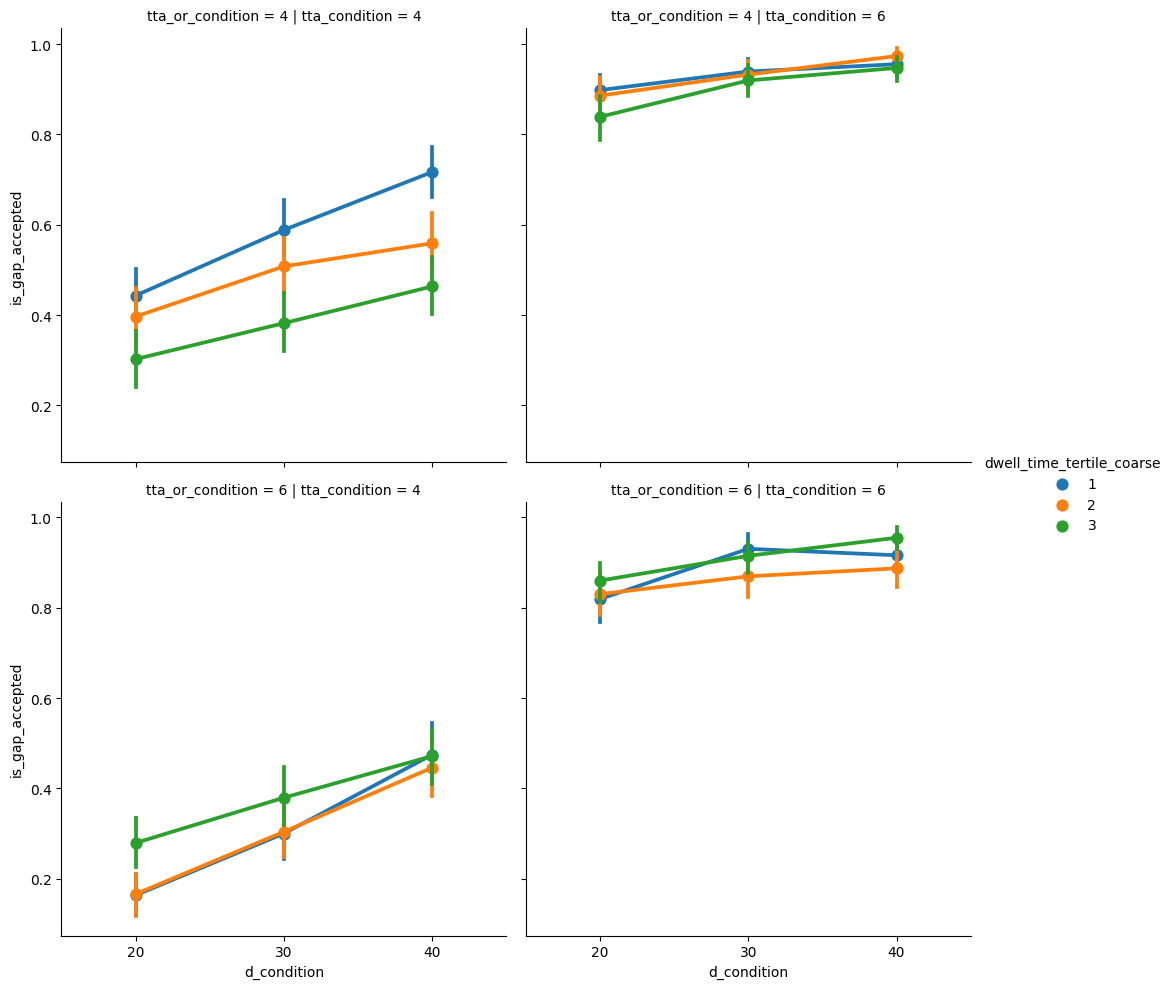

In [21]:
sns.catplot(data=exp_measures, x="d_condition", y="is_gap_accepted", col="tta_condition", row="tta_or_condition", hue="dwell_time_tertile_coarse", kind="point")

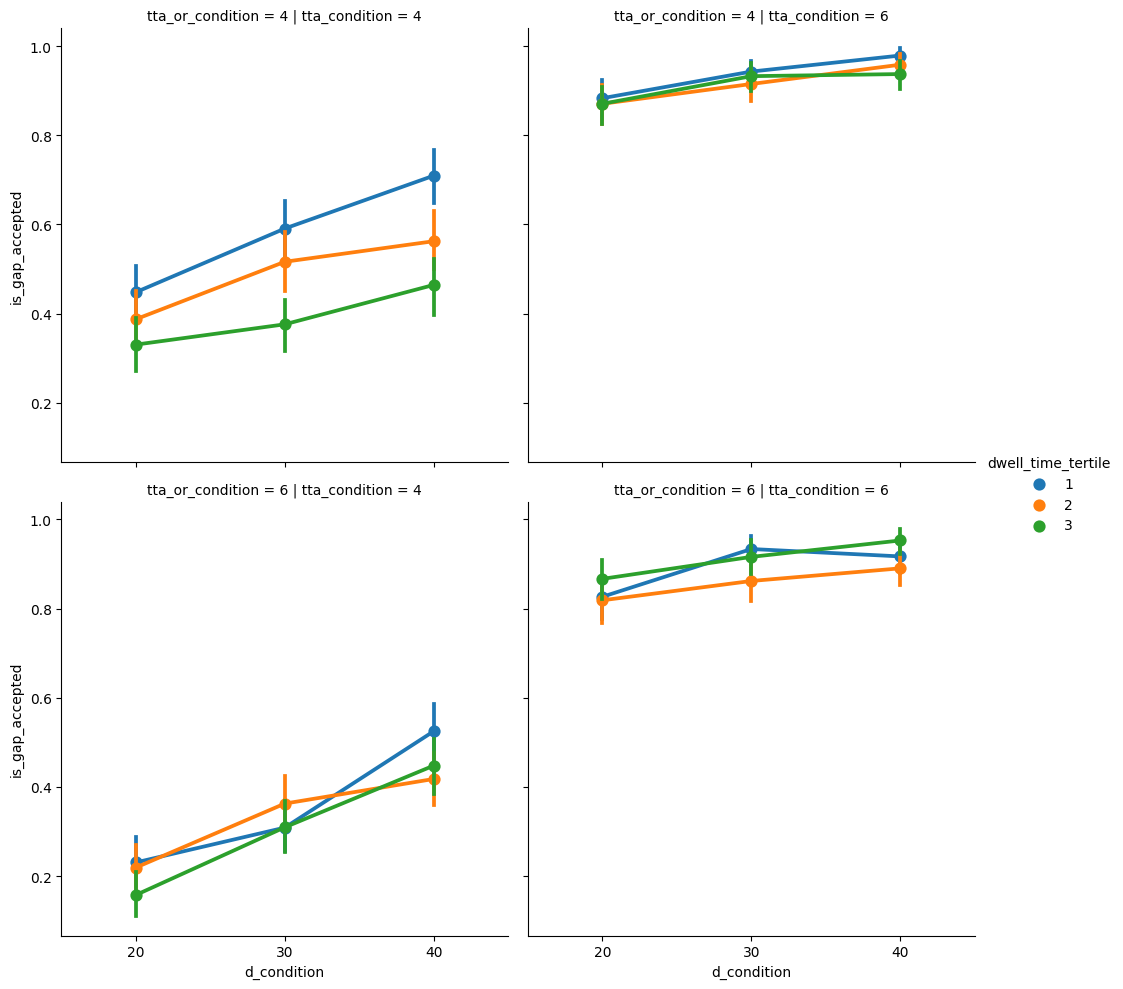

In [14]:
sns.catplot(data=exp_measures, x="d_condition", y="is_gap_accepted", col="tta_condition", row="tta_or_condition", hue="dwell_time_tertile", kind="point")